In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)           #to display all the rows

In [3]:
pd.set_option('display.max_columns',None)        #to display all the columns

# Load the Dataset

In [4]:
data=pd.read_csv('values.csv')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


In [5]:
#dropping 'patient_id' column
data.drop('patient_id',axis=1,inplace=True)

# Business Statement
- By using the given details of a patient we have to predict whether a patient has a heart disease or not.

# Domain Analysis
- patient_id: unique identifier for each patient in the dataset.

- slope_of_peak_exercise_st_segment: the slope of the peak exercise ST segment, which is a measurement of the ST segment on an electrocardiogram (ECG) during exercise. It is a categorical variable with values of 1, 2, or 3.

- thal: results of a thallium stress test, which is used to diagnose heart disease. It is a categorical variable with values of normal, fixed defect, reversible defect, or unknown.

- resting_blood_pressure: the resting blood pressure of the patient in mm Hg.

- chest_pain_type: the type of chest pain experienced by the patient, which is a categorical variable with values of typical angina, atypical angina, non-anginal pain, or asymptomatic.

- num_major_vessels: the number of major blood vessels colored by flourosopy, which is a diagnostic test that uses a special dye and X-rays to show the inside of blood vessels. It is a categorical variable with values of 0, 1, 2, 3, or 4.

- fasting_blood_sugar_gt_120_mg_per_dl: whether the patient's fasting blood sugar is greater than 120 mg/dL or not. It is a binary variable with values of 0 or 1.

- resting_ekg_results: results of a resting electrocardiogram (ECG) test, which measures the electrical activity of the heart. It is a categorical variable with values of normal, ST-T wave abnormality, or left ventricular hypertrophy.

- serum_cholesterol_mg_per_dl: the level of serum cholesterol in the patient's blood in mg/dL.

- oldpeak_eq_st_depression: the ST depression induced by exercise relative to rest, which is a measure of the heart's response to exercise. It is a numerical variable.

- sex: the gender of the patient, which is a binary variable with values of 0 for female and 1 for male.

- age: the age of the patient in years.

- max_heart_rate_achieved: the maximum heart rate achieved during exercise.

- exercise_induced_angina: whether the patient experienced angina (chest pain or discomfort) during exercise or not. It is a binary variable with values of 0 or 1.

- heart_disease_present: whether or not the patient has heart disease. It is a binary variable with values of 0 or 1.

# Basic Checks

In [6]:
data.info()                           #information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [7]:
data.describe()                                #statistical information of the dataset

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [8]:
data.describe(include='O')               #categorical columns statistical information of the dataset

,thal
count,180
unique,3
top,normal
freq,98


In [9]:
data.head()                            #first five rows of the dataset

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [10]:
data.tail()                           #last five rows of the dataset

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [11]:
data.shape                            #shape of the dataset

(180, 14)

In [12]:
data.size                             #size of the dataset

2520

In [13]:
data.isnull().sum()                              #checking for null values

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [14]:
data.isna().sum()                               #checking for missing values

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [15]:
data.duplicated().sum()                         #checking for duplicated values

0

# EDA

# Univariate Analysis

In [16]:
import sweetviz as sv                             #library for univariate analysis
my_report=sv.analyze(data)                        #pass the original dataframe
my_report.show_html()                             #Default arguments will generate to "SWEETVIZ_REPORT.html"                          

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights of Univariate Analysis
- 52% of the patients have the priority of slope exercise segment.
- 54% of the patients have the normal(no defect) of thal.
- 14.4% of the patients have the 130 as the resting blood pressure.
- 46% of the patients have the value 4 of chest pain type.
- 59% of the patients have no major blood vessel blockages.
- 84% of the patients have fasting blood sugar levels below 120 mg/dl, which is considered normal.
- 52% of the patients have normal resting ECG results.
- 33% of the patients have normal cholesterol levels, but there is a significant minority with high cholesterol levels.
- 47% of the patients have have no or minimal ST segment depression during exercise, but there is a significant minority with moderate or severe depression, which can indicate a higher risk of heart disease.
- 69% of the males are more likely to develop heart disease than females.
- 20% of the Older individuals are more likely to develop heart disease than younger individuals.
- 20% of the individuals achieve a maximum heart rate of around 150-170 beats per minute during exercise.
- 68% of the individuals experience exercise-induced angina may be at higher risk of heart disease.
- target column shows proportion of individuals without heart disease than with heart disease.

# Bivariate Analysis

In [17]:
data.columns                             #fetching columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [18]:
#dividing the data into numerical and categorical data
numerical_data=data[['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina','heart_disease_present']]
categorical_data=data['thal']

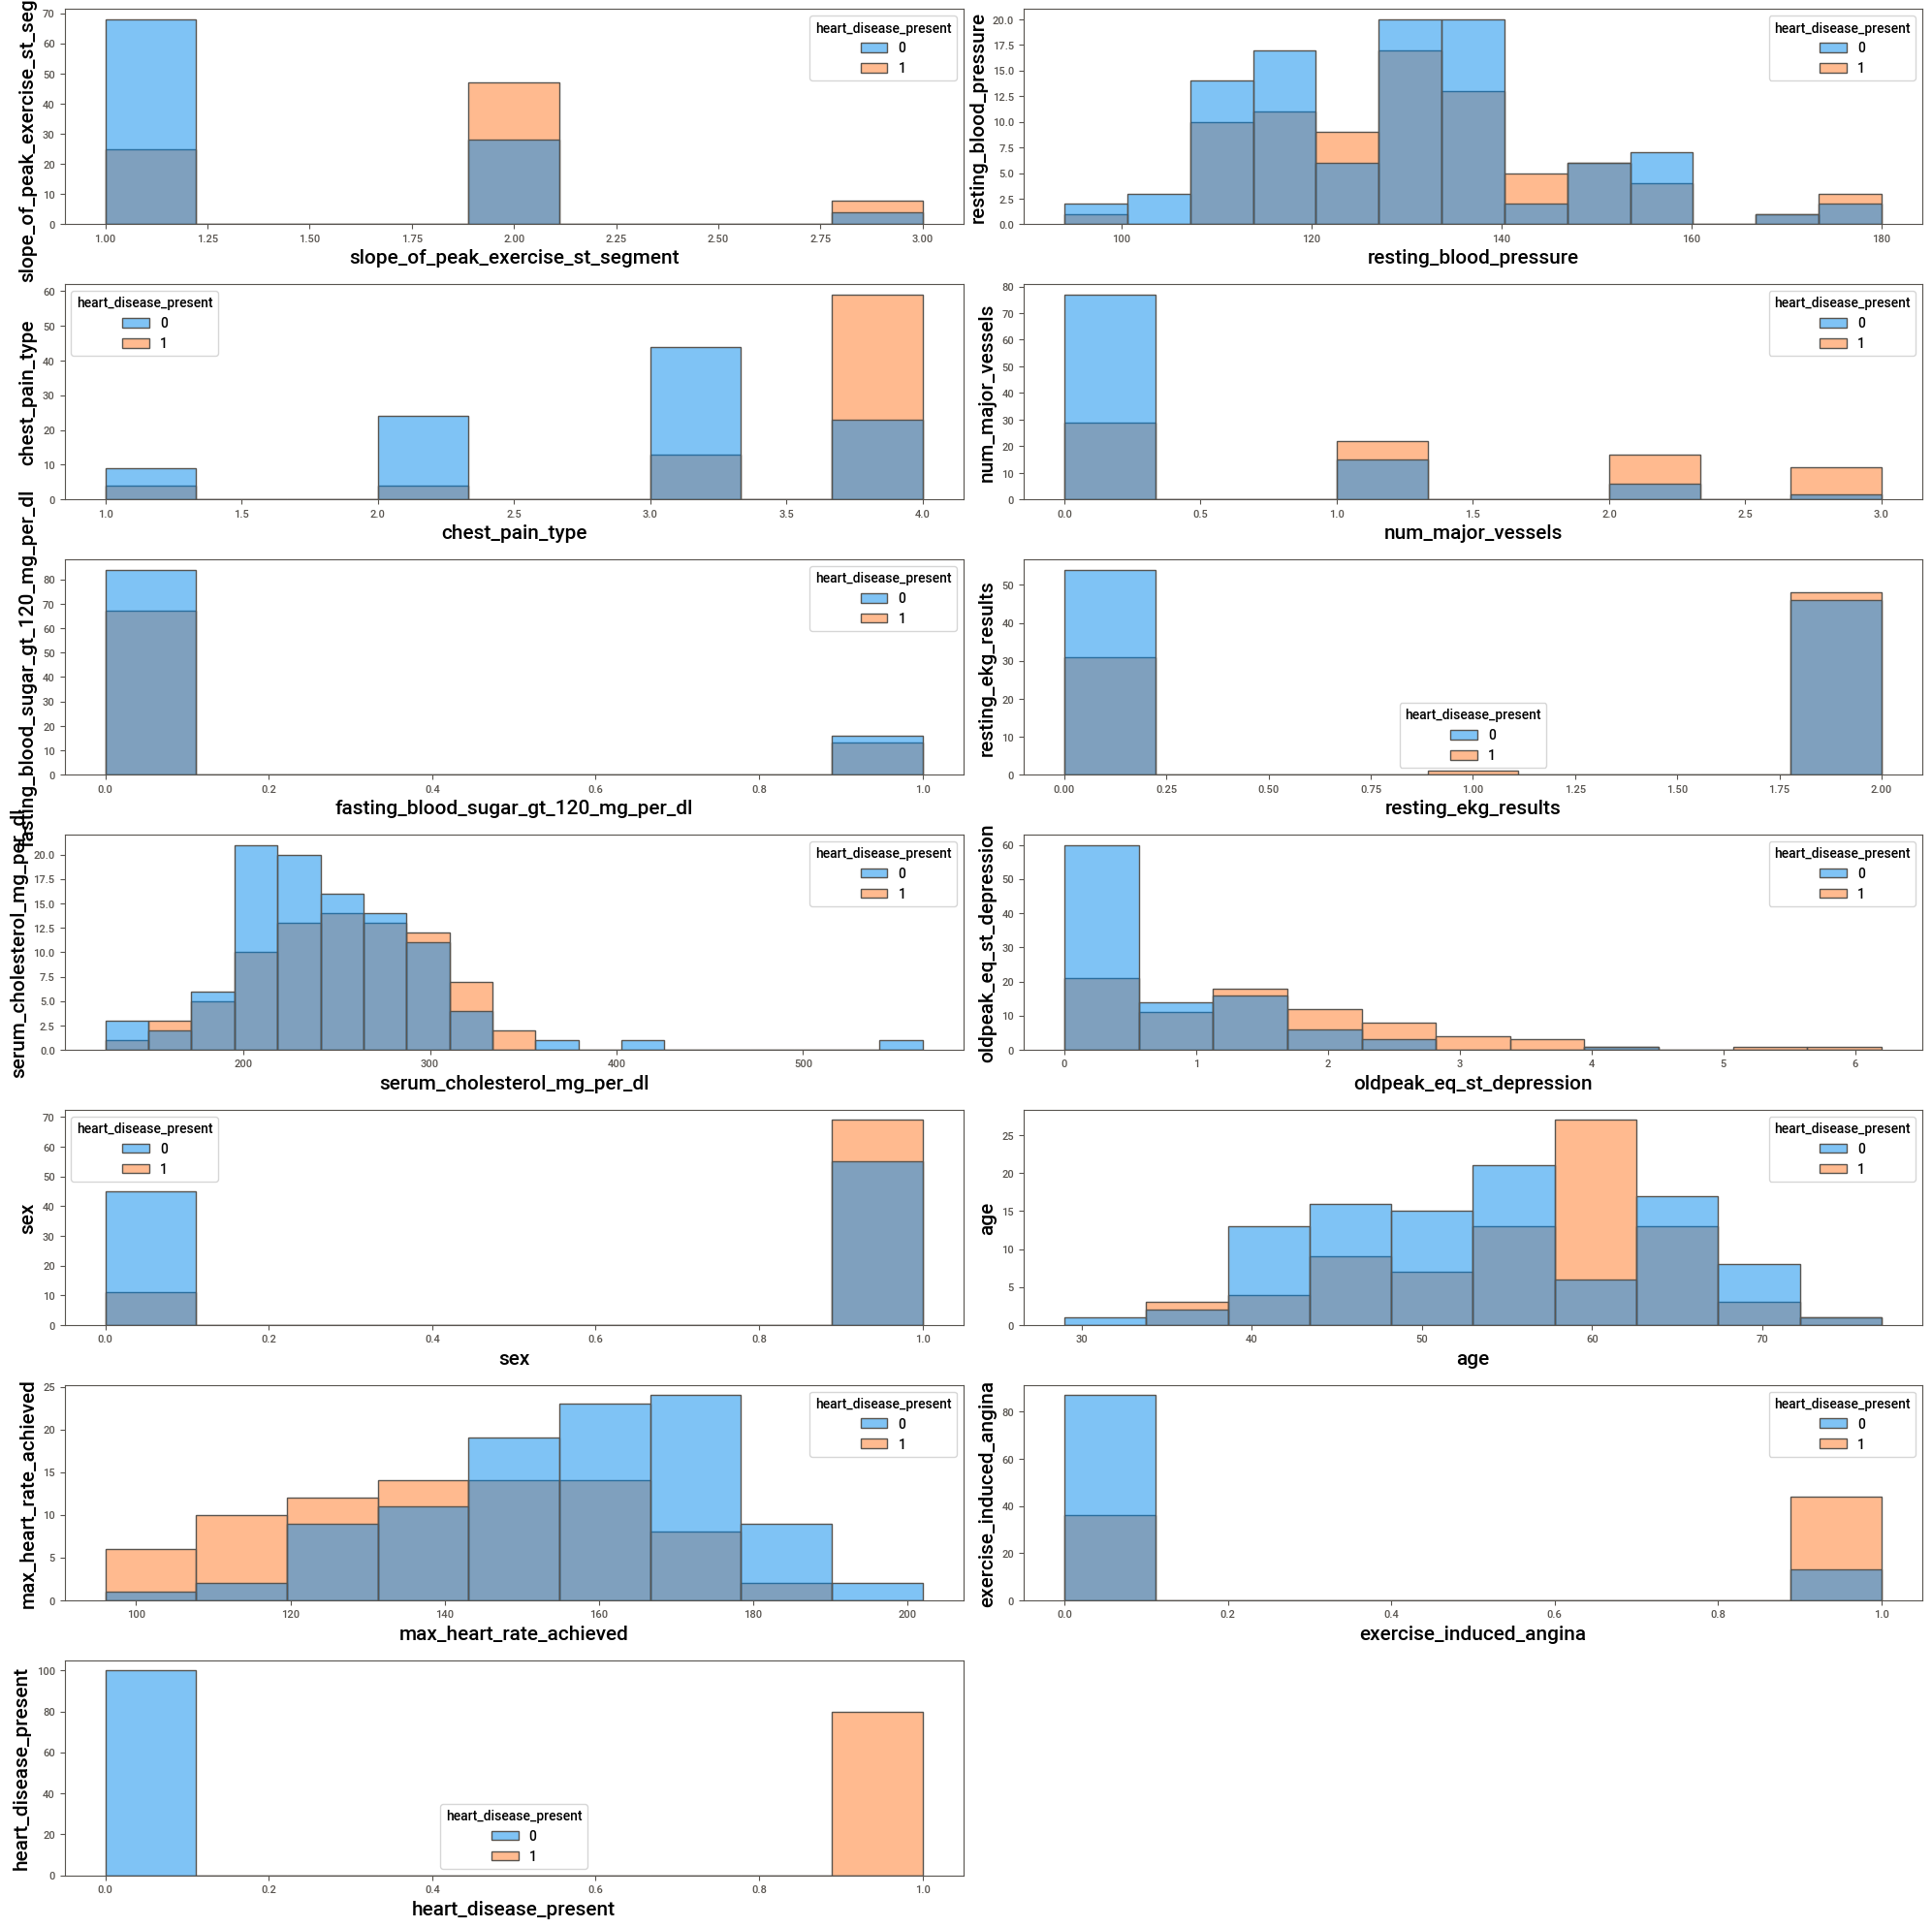

In [19]:
#plotting numerical_data
plt.figure(figsize=(20,20))            #plotting the figure
plotnumber=1                           #plotnumber
for i in numerical_data:
    plt.subplot(7,2,plotnumber)        #subplot
    sns.histplot(data=numerical_data,x=i,hue=data['heart_disease_present'])        #using histplot for the data
    plotnumber+=1                      #plotnumber increment
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()

### Conversion of categorical data into numerical data

In [20]:
from sklearn.preprocessing import LabelEncoder              #importing label encoder
lc=LabelEncoder()                                           #object creation for label encoder
data.thal=lc.fit_transform(data.thal)                       #fitting thal column data to convert into numerical data

In [21]:
data.thal.value_counts()                                    #value counts of thal column

1    98
2    74
0     8
Name: thal, dtype: int64

In [22]:
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
5,1,1,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2,2,150,4,2,0,2,258,2.6,0,60,157,0,1
7,2,0,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3,2,170,4,0,0,2,326,3.4,1,59,140,1,1
9,2,1,120,3,0,0,0,219,1.6,0,50,158,0,0


# Insights of Bivariate Analysis
### Slope of peak exercise ST segment vs heart disease present: 
- Slope of peak exercise ST segment and heart disease present: 
- Individuals with a downsloping ST segment during peak exercise are more likely to have heart disease than individuals with a flat or upsloping ST segment.
### thal vs heart disease present
- Thal and heart disease present: 
- Individuals with thalassemia are more likely to have heart disease than individuals without thalassemia.
### resting blood pressure vs heart disease present
- Resting blood pressure and heart disease present: 
- Individuals with high resting blood pressure are more likely to have heart disease than individuals with normal or low resting blood pressure.
### chest pain type vs heart disease present
- Chest pain type and heart disease present: 
- Individuals with non-anginal chest pain or atypical angina are less likely to have heart disease than individuals with typical angina.
### Number of major vessels vs heart disease present
- Number of major vessels and heart disease present: 
- Individuals with one or more blocked major blood vessels are more likely to have heart disease than individuals with no blocked vessels.
### Fasting blood pressure vs heart disease present
- Fasting blood sugar > 120 mg/dl and heart disease present: 
- Individuals with high fasting blood sugar levels are more likely to have heart disease than individuals with normal fasting blood sugar levels.
### resting ecg results vs heart disease present
- Resting ECG results and heart disease present: 
- Individuals with abnormal resting ECG results are more likely to have heart disease than individuals with normal resting ECG results.
### Serum cholesterol vs heart disease present
- Serum cholesterol and heart disease present: 
- Individuals with high serum cholesterol levels are more likely to have heart disease than individuals with normal serum cholesterol levels.
### Oldpeak equal to ST depression vs heart disease present
- Oldpeak equal to ST depression and heart disease present: 
- Individuals with moderate or severe ST segment depression during exercise are more likely to have heart disease than individuals with no or minimal depression.
### sex vs heart disease present
- Sex and heart disease present: 
- Males are more likely to have heart disease than females.
### age vs heart disease present
- Age and heart disease present: 
- Older individuals are more likely to have heart disease than younger individuals.
### Max heart rate achieved vs heart disease present
- Max heart rate achieved and heart disease present: 
- Individuals with lower maximum heart rates during exercise are more likely to have heart disease than individuals with higher maximum heart rates.
### Exercise induced angina vs heart disease present
- Exercise induced angina and heart disease present: 
- Individuals who experience angina during exercise are more likely to have heart disease than individuals who do not experience angina during exercise.

# Data Preprocessing

In [23]:
data.isnull().sum()                                #checking for null values

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [24]:
data.isna().sum()                                 #checking for missing values

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

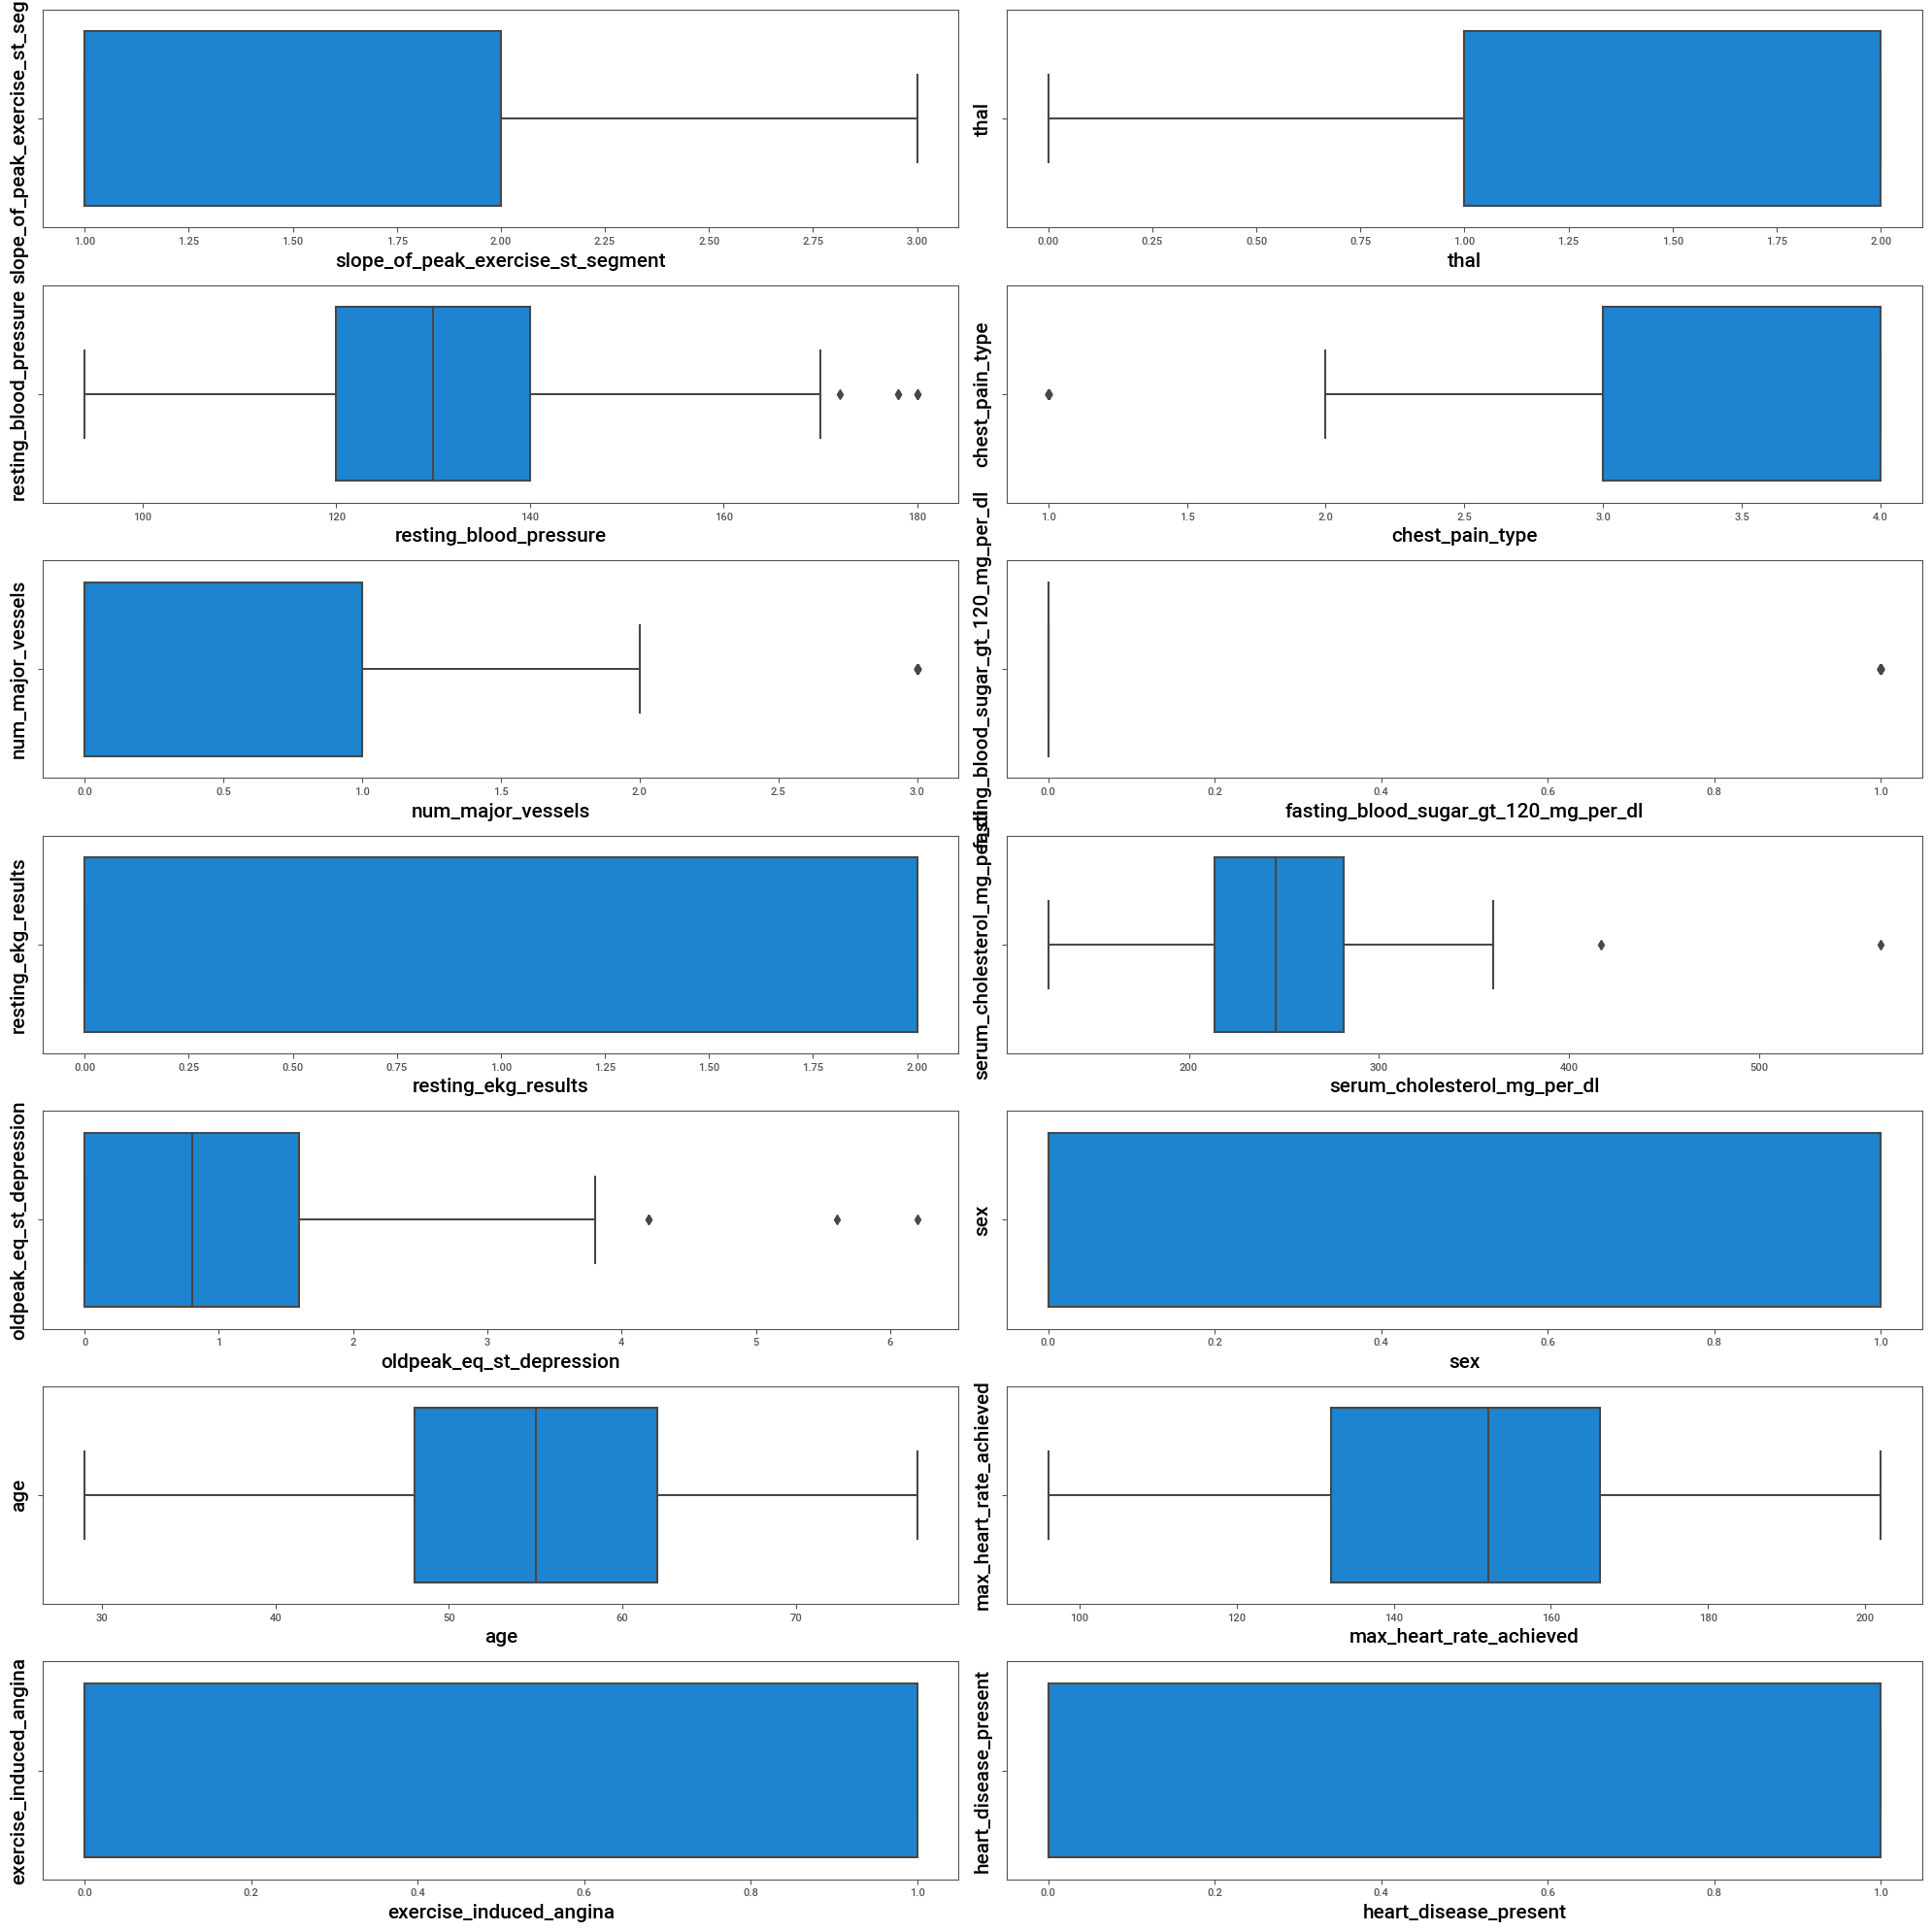

In [25]:
#checking for outliers
plt.figure(figsize=(20,20))            #plotting the figure
plotnumber=1                           #plotnumber
for i in data:
    plt.subplot(7,2,plotnumber)        #subplot
    sns.boxplot(data=data,x=i,hue=data['heart_disease_present'])        #using boxplot for finding outliers of the data
    plotnumber+=1                      #plotnumber increment
    plt.xlabel(i,fontsize=15)
    plt.ylabel(i,fontsize=15)
plt.tight_layout()

# Using IQR to remove Outliers

In [26]:
from scipy import stats             #importing stats for scipy library
IQR=stats.iqr(data.slope_of_peak_exercise_st_segment,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [27]:
Q1=data.slope_of_peak_exercise_st_segment.quantile(0.25)   #defining 25% of data
Q1

1.0

In [28]:
Q3=data.slope_of_peak_exercise_st_segment.quantile(0.75)  #defining 75% of data
Q3

2.0

In [29]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-0.5

In [30]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

3.5

In [31]:
data.loc[data['slope_of_peak_exercise_st_segment']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [32]:
data.loc[data['slope_of_peak_exercise_st_segment']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [33]:
IQR=stats.iqr(data.thal,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [34]:
Q1=data.thal.quantile(0.25)   #defining 25% of data
Q1

1.0

In [35]:
Q3=data.thal.quantile(0.75)  #defining 75% of data
Q3

2.0

In [36]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-0.5

In [37]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

3.5

In [38]:
data.loc[data['thal']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [39]:
data.loc[data['slope_of_peak_exercise_st_segment']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [40]:
IQR=stats.iqr(data.resting_blood_pressure,interpolation='midpoint')        #calculating Inter quantile range
IQR

20.0

In [41]:
Q1=data.resting_blood_pressure.quantile(0.25)   #defining 25% of data
Q1

120.0

In [42]:
Q3=data.resting_blood_pressure.quantile(0.75)  #defining 75% of data
Q3

140.0

In [43]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

90.0

In [44]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

170.0

In [45]:
data.loc[data['resting_blood_pressure']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [46]:
data.loc[data['resting_blood_pressure']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,1,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,2,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,2,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,2,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1


In [47]:
data.loc[data['resting_blood_pressure']>max_limit]=np.median(data['resting_blood_pressure'])    #imputing value with median

In [48]:
data.resting_blood_pressure=np.sqrt(data.resting_blood_pressure)

In [49]:
IQR=stats.iqr(data.chest_pain_type,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [50]:
Q1=data.chest_pain_type.quantile(0.25)   #defining 25% of data
Q1

3.0

In [51]:
Q3=data.chest_pain_type.quantile(0.75)  #defining 75% of data
Q3

4.0

In [52]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

1.5

In [53]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

5.5

In [54]:
data.loc[data['chest_pain_type']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
14,2,2,10.954451,1,0,0,0,231,3.8,1,38,182,1,1
97,2,1,12.649111,1,1,1,2,234,0.1,1,69,131,0,0
99,1,1,12.247449,1,0,1,2,283,1.0,0,58,162,0,0
108,1,1,11.180340,1,1,0,2,213,1.4,1,51,125,1,0
120,2,1,11.747340,1,1,1,2,282,1.4,1,65,174,0,1
141,2,2,10.954451,1,0,0,2,193,1.9,1,56,162,0,0
146,1,2,11.832160,1,0,0,0,199,1.4,1,40,178,1,0
147,2,1,11.575837,1,2,0,0,234,2.6,1,61,145,0,1
155,1,1,12.649111,1,0,0,2,273,0.0,1,59,125,0,1
156,1,1,11.832160,1,2,0,0,239,1.8,0,69,151,0,0


In [55]:
data.loc[data['chest_pain_type']<min_limit]=np.median(data['chest_pain_type'])    #imputing value with median

In [56]:
data.loc[data['chest_pain_type']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130,130
33,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130,130
72,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130,130
75,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130,130
113,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130,130
176,130,130,11.401754,130,130,130,130,130,130.0,130,130,130,130,130


In [57]:
data.loc[data['chest_pain_type']>max_limit]=np.median(data['chest_pain_type'])    #imputing value with median

In [58]:
data.chest_pain_type=np.sqrt(data.chest_pain_type)

In [59]:
IQR=stats.iqr(data.num_major_vessels,interpolation='midpoint')        #calculating Inter quantile range
IQR

2.0

In [60]:
Q1=data.num_major_vessels.quantile(0.25)   #defining 25% of data
Q1

0.0

In [61]:
Q3=data.num_major_vessels.quantile(0.75)  #defining 75% of data
Q3

2.0

In [62]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-3.0

In [63]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

5.0

In [64]:
data.loc[data['num_major_vessels']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [65]:
data.loc[data['chest_pain_type']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [66]:
IQR=stats.iqr(data.fasting_blood_sugar_gt_120_mg_per_dl,interpolation='midpoint')        #calculating Inter quantile range
IQR

0.0

In [67]:
Q1=data.fasting_blood_sugar_gt_120_mg_per_dl.quantile(0.25)   #defining 25% of data
Q1

0.0

In [68]:
Q3=data.fasting_blood_sugar_gt_120_mg_per_dl.quantile(0.75)   #defining 75% of data
Q3

0.0

In [69]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

0.0

In [70]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

0.0

In [71]:
data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [72]:
data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,3,3.000000,1.732051,3,3,3,3,3.0,3,3,3,3,3
14,3,3,3.000000,1.732051,3,3,3,3,3.0,3,3,3,3,3
19,1,1,11.661904,1.414214,2,1,2,319,0.0,0,58,152,0,1
21,1,2,10.392305,2.000000,3,1,0,233,0.1,1,52,147,0,0
27,1,1,11.313708,1.414214,0,1,0,205,0.0,1,52,184,0,0
32,3,2,11.832160,2.000000,0,1,2,203,3.1,1,53,155,1,1
33,3,3,3.000000,1.732051,3,3,3,3,3.0,3,3,3,3,3
36,1,2,12.247449,1.732051,1,1,0,126,0.2,1,57,173,0,0
40,2,1,12.247449,1.732051,0,1,0,243,1.0,1,61,137,1,0
42,1,1,10.488088,1.732051,1,1,2,265,0.0,0,71,130,0,0


In [73]:
data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']>max_limit]=np.median(data['fasting_blood_sugar_gt_120_mg_per_dl'])       #imputing value with median

In [74]:
data.fasting_blood_sugar_gt_120_mg_per_dl=np.sqrt(data.fasting_blood_sugar_gt_120_mg_per_dl)

In [75]:
IQR=stats.iqr(data.resting_ekg_results,interpolation='midpoint')        #calculating Inter quantile range
IQR

2.0

In [76]:
Q1=data.resting_ekg_results.quantile(0.25)   #defining 25% of data
Q1

0.0

In [77]:
Q3=data.resting_ekg_results.quantile(0.75)   #defining 75% of data
Q3

2.0

In [78]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-3.0

In [79]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

5.0

In [80]:
data.loc[data['resting_ekg_results']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [81]:
data.loc[data['resting_ekg_results']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [82]:
IQR=stats.iqr(data.serum_cholesterol_mg_per_dl,interpolation='midpoint')        #calculating Inter quantile range
IQR

103.5

In [83]:
Q1=data.serum_cholesterol_mg_per_dl.quantile(0.25)   #defining 25% of data
Q1

166.25

In [84]:
Q3=data.serum_cholesterol_mg_per_dl.quantile(0.75)   #defining 75% of data
Q3

269.0

In [85]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

11.0

In [86]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

424.25

In [87]:
data.loc[data['serum_cholesterol_mg_per_dl']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
14,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
19,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
21,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
27,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
32,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
33,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
36,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
40,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0
42,0,0,0.0,0.0,0,0.0,0,0,0.0,0,0,0,0,0


In [88]:
data.loc[data['serum_cholesterol_mg_per_dl']<min_limit]=np.median(data['serum_cholesterol_mg_per_dl'])      #imputing value with median

In [89]:
data.loc[data['serum_cholesterol_mg_per_dl']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
60,2,2,10.723805,1.732051,0,0.0,2,564,1.6,0,67,160,0,0


In [90]:
data.loc[data['serum_cholesterol_mg_per_dl']>max_limit]=np.median(data['serum_cholesterol_mg_per_dl'])

In [91]:
data.serum_cholesterol_mg_per_dl=np.sqrt(data.serum_cholesterol_mg_per_dl)

In [92]:
IQR=stats.iqr(data.oldpeak_eq_st_depression,interpolation='midpoint')        #calculating Inter quantile range
IQR

3.3

In [93]:
Q1=data.oldpeak_eq_st_depression.quantile(0.25)   #defining 25% of data
Q1

0.0

In [94]:
Q3=data.oldpeak_eq_st_depression.quantile(0.75)   #defining 75% of data
Q3

3.25

In [95]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-4.949999999999999

In [96]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

8.2

In [97]:
data.loc[data['oldpeak_eq_st_depression']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [98]:
data.loc[data['oldpeak_eq_st_depression']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
14,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
19,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
21,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
27,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
32,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
33,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
36,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
40,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226
42,226,226,226.0,226.0,226,226.0,226,15.033296,226.0,226,226,226,226,226


In [99]:
data.loc[data['oldpeak_eq_st_depression']>max_limit]=np.median(data['oldpeak_eq_st_depression'])        #imputing value with median

In [100]:
data.oldpeak_eq_st_depression=np.sqrt(data.oldpeak_eq_st_depression)

In [101]:
IQR=stats.iqr(data.sex,interpolation='midpoint')        #calculating Inter quantile range
IQR

0.5

In [102]:
Q1=data.sex.quantile(0.25)   #defining 25% of data
Q1

0.75

In [103]:
Q3=data.sex.quantile(0.75)   #defining 75% of data
Q3

1.0

In [104]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

0.0

In [105]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

1.75

In [106]:
data.loc[data['sex']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [107]:
data.loc[data['sex']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [108]:
IQR=stats.iqr(data.age,interpolation='midpoint')        #calculating Inter quantile range
IQR

23.0

In [109]:
Q1=data.age.quantile(0.25)   #defining 25% of data
Q1

36.5

In [110]:
Q3=data.age.quantile(0.75)   #defining 75% of data
Q3

59.0

In [111]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

2.0

In [112]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

93.5

In [113]:
data.loc[data['age']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
14,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
19,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
21,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
27,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
32,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
33,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
36,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
40,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2
42,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.095445,1.2,1.2,1.2,1.2,1.2


In [114]:
data.loc[data['age']<min_limit]=np.median(data['age'])           #imputing value with median

In [115]:
data.loc[data['age']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [116]:
data.age=np.sqrt(data.age)

In [117]:
IQR=stats.iqr(data.max_heart_rate_achieved,interpolation='midpoint')        #calculating Inter quantile range
IQR

58.0

In [118]:
Q1=data.max_heart_rate_achieved.quantile(0.25)   #defining 25% of data
Q1

104.5

In [119]:
Q3=data.max_heart_rate_achieved.quantile(0.75)   #defining 75% of data
Q3

162.0

In [120]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

17.5

In [121]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

249.0

In [122]:
data.loc[data['max_heart_rate_achieved']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [123]:
data.loc[data['max_heart_rate_achieved']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [124]:
IQR=stats.iqr(data.exercise_induced_angina,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [125]:
Q1=data.exercise_induced_angina.quantile(0.25)   #defining 25% of data
Q1

0.0

In [126]:
Q3=data.exercise_induced_angina.quantile(0.75)   #defining 75% of data
Q3

1.0

In [127]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-1.5

In [128]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

2.5

In [129]:
data.loc[data['exercise_induced_angina']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [130]:
data.loc[data['exercise_induced_angina']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
14,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
19,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
21,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
27,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
32,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
33,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
36,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
40,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0
42,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,7.071068,50.0,50.0,50.0


In [131]:
data.loc[data['exercise_induced_angina']>max_limit]=np.median(data['exercise_induced_angina'])       #imputing value with median

In [132]:
data.exercise_induced_angina=np.sqrt(data.exercise_induced_angina)

In [133]:
IQR=stats.iqr(data.heart_disease_present,interpolation='midpoint')        #calculating Inter quantile range
IQR

1.0

In [134]:
Q1=data.heart_disease_present.quantile(0.25)   #defining 25% of data
Q1

0.0

In [135]:
Q3=data.heart_disease_present.quantile(0.75)   #defining 75% of data
Q3

1.0

In [136]:
min_limit=Q1-1.5*IQR              #setting minimum limit
min_limit

-1.5

In [137]:
max_limit=Q3+1.5*IQR              #setting maximum limit
max_limit

2.5

In [138]:
data.loc[data['heart_disease_present']<min_limit]         #checking values which are less than minimum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [139]:
data.loc[data['heart_disease_present']>max_limit]         #checking values which are greater than maximum limit

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [140]:
data.heart_disease_present=np.sqrt(data.heart_disease_present)

# Feature Selection

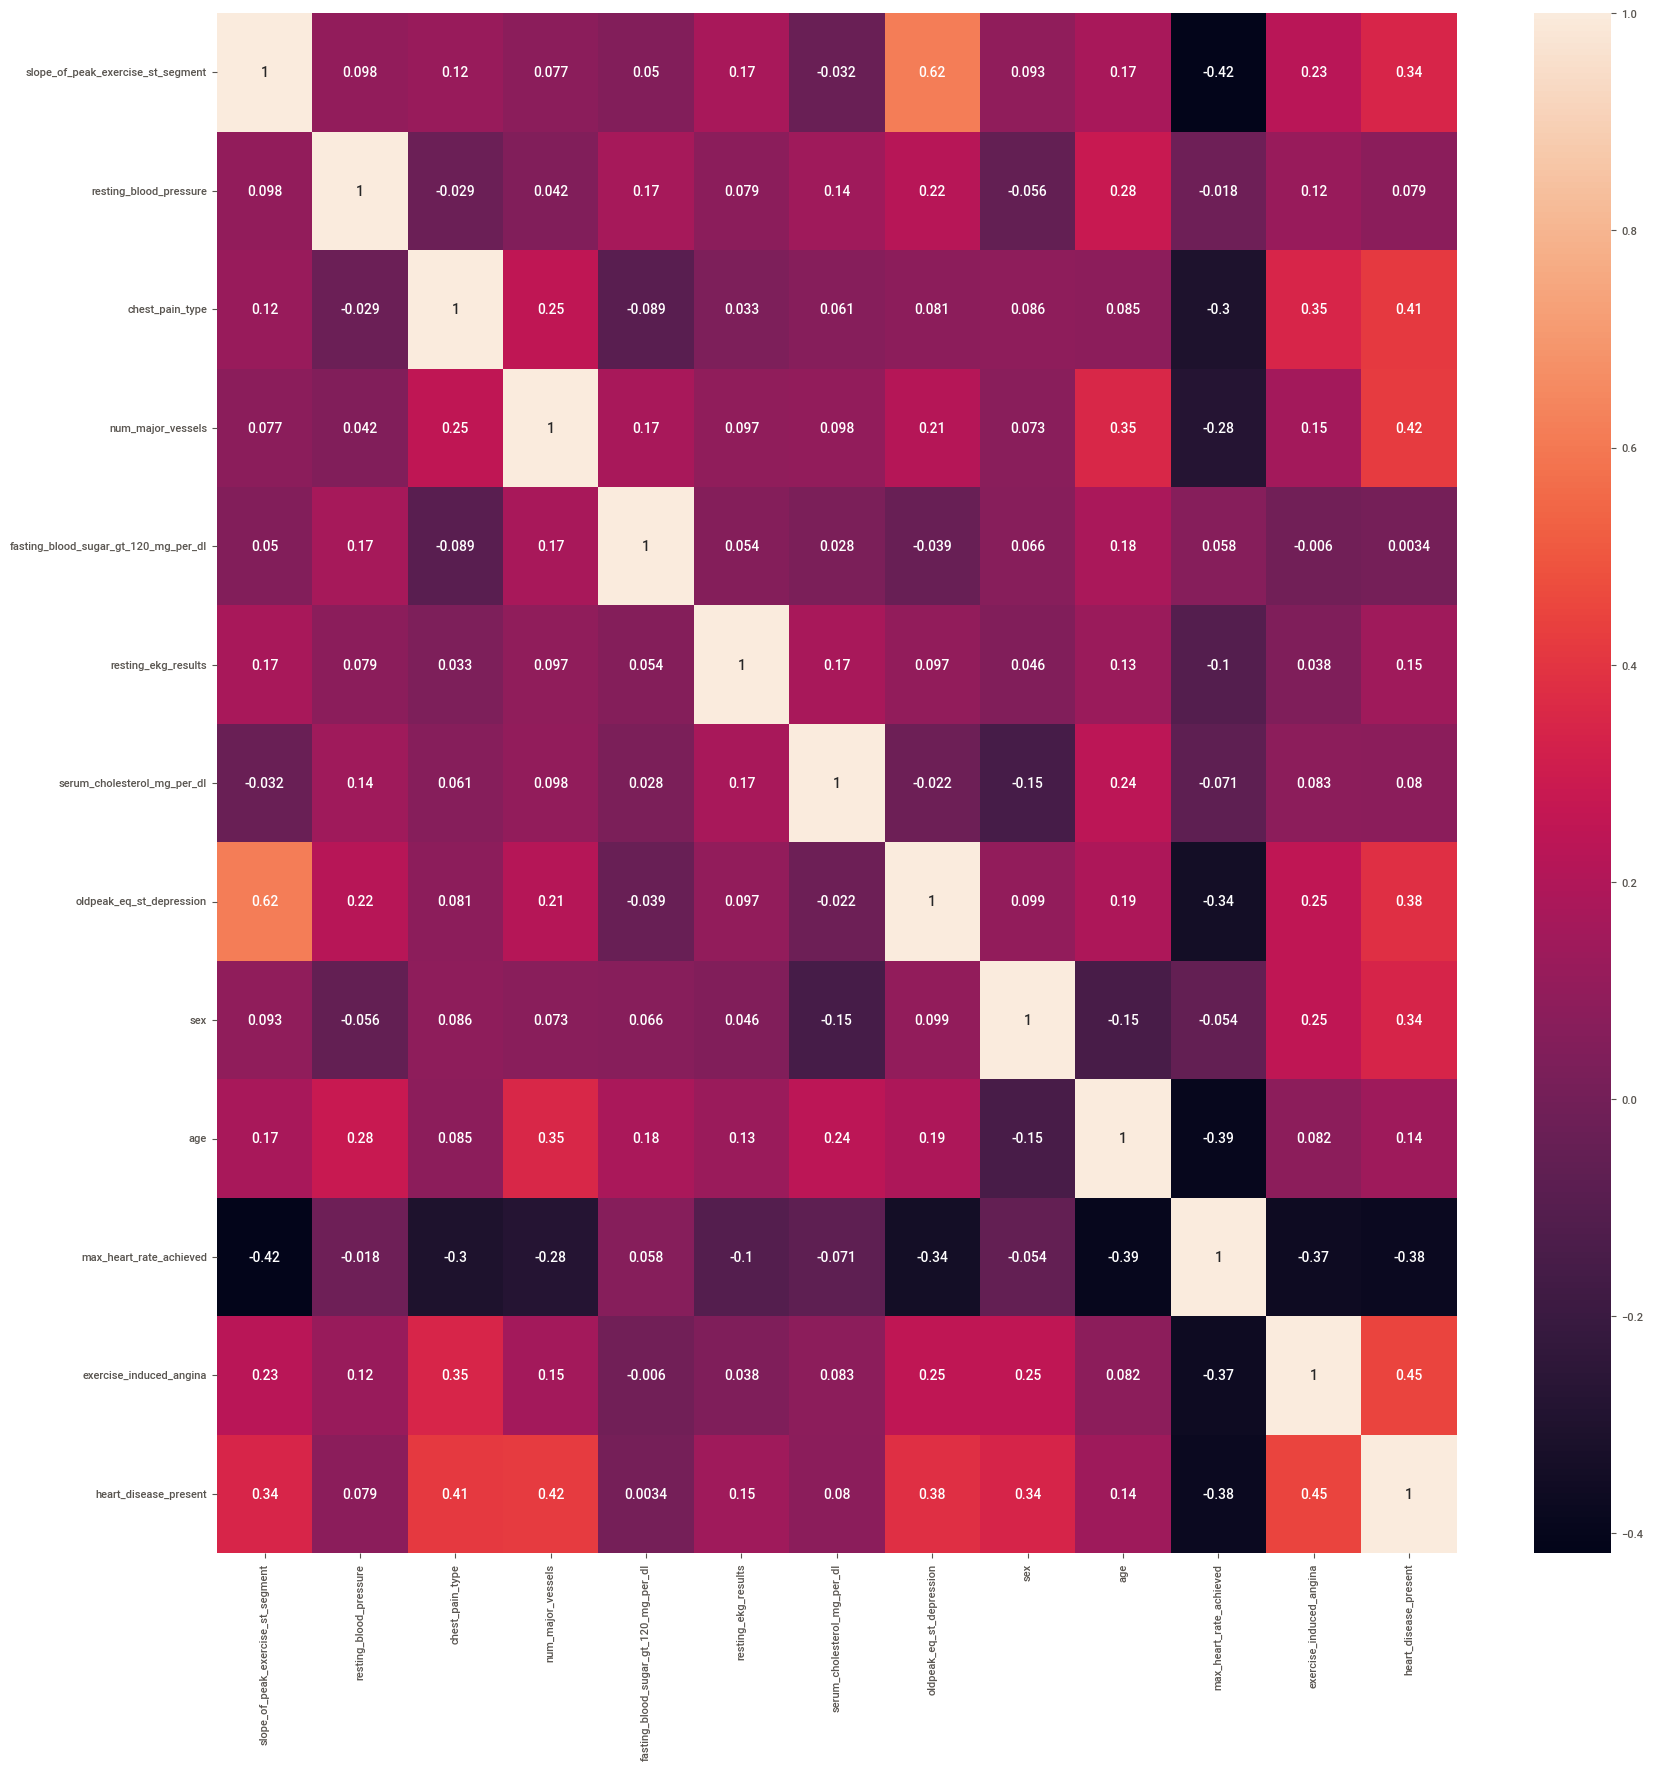

In [141]:
plt.figure(figsize=(20,20))                                  #plotting figure
numerical_data.drop('heart_disease_present',axis=1)          #dropping output column
sns.heatmap(numerical_data.corr(),annot=True)                #plotting heatmap
plt.show()

# Model Creation

In [142]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [143]:
#splitting the data into x and y
x=data[['slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved', 'exercise_induced_angina']]
y=data.heart_disease_present

In [144]:
x

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1.0,1.0,11.313708,1.414214,0.0,0.0,2.0,17.549929,0.000000,1.0,6.708204,170.0,0.0
1,2.0,1.0,10.488088,1.732051,0.0,0.0,0.0,14.628739,1.264911,0.0,7.348469,158.0,0.0
2,1.0,1.0,11.180340,2.000000,3.0,0.0,2.0,17.435596,0.000000,1.0,8.774964,162.0,1.0
3,1.0,2.0,12.328828,2.000000,0.0,0.0,0.0,14.933185,0.000000,1.0,6.324555,181.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
5,1.0,1.0,11.401754,1.732051,0.0,0.0,0.0,13.416408,0.000000,1.0,6.480741,150.0,0.0
6,2.0,2.0,12.247449,2.000000,2.0,0.0,2.0,16.062378,1.612452,0.0,7.745967,157.0,0.0
7,2.0,0.0,12.247449,2.000000,1.0,0.0,2.0,16.613248,0.774597,1.0,7.549834,112.0,1.0
8,3.0,2.0,13.038405,2.000000,0.0,0.0,2.0,18.055470,1.843909,1.0,7.681146,140.0,1.0
9,2.0,1.0,10.954451,1.732051,0.0,0.0,0.0,14.798649,1.264911,0.0,7.071068,158.0,0.0


In [145]:
y

0      0.0
1      0.0
2      1.0
3      1.0
4      0.0
5      0.0
6      1.0
7      1.0
8      1.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     1.0
29     0.0
30     0.0
31     1.0
32     0.0
33     0.0
34     1.0
35     0.0
36     0.0
37     0.0
38     0.0
39     1.0
40     0.0
41     0.0
42     0.0
43     0.0
44     0.0
45     1.0
46     0.0
47     0.0
48     1.0
49     0.0
50     1.0
51     0.0
52     0.0
53     0.0
54     1.0
55     0.0
56     1.0
57     1.0
58     0.0
59     1.0
60     0.0
61     1.0
62     0.0
63     0.0
64     0.0
65     1.0
66     1.0
67     0.0
68     0.0
69     1.0
70     0.0
71     0.0
72     0.0
73     0.0
74     0.0
75     0.0
76     0.0
77     1.0
78     1.0
79     1.0
80     0.0
81     1.0
82     1.0
83     1.0
84     0.0
85     1.0
86     0.0
87     1.0
88     0.0
89     0.0
90     0.0

# Scaling

In [146]:
from sklearn.preprocessing import MinMaxScaler        #importing minmaxscaler
scaler=MinMaxScaler()                                 #objecct creation for scaler
x_scaled=scaler.fit_transform(x)                      #fitting the data

In [147]:
x_scaled                                              #x_scaled values

array([[0.33333333, 0.5       , 0.86772183, ..., 0.76447079, 0.84158416,
        0.        ],
       [0.66666667, 0.5       , 0.80439967, ..., 0.83743579, 0.78217822,
        0.        ],
       [0.33333333, 0.5       , 0.85749293, ..., 1.        , 0.8019802 ,
        1.        ],
       ...,
       [0.66666667, 1.        , 0.85749293, ..., 0.91168461, 0.64851485,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.5       , 0.9701425 , ..., 0.83743579, 0.80693069,
        0.        ]])

In [148]:
from sklearn.model_selection import train_test_split                    #importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)   

In [149]:
x_train                                                           #x_train values

array([[0.33333333, 0.5       , 0.87447463, ..., 0.72970373, 0.85148515,
        0.        ],
       [0.66666667, 0.5       , 0.88782616, ..., 0.79772404, 0.8019802 ,
        0.        ],
       [0.33333333, 0.5       , 0.84016805, ..., 0.98032595, 0.5990099 ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 1.        , 0.80439967, ..., 0.8753478 , 0.7029703 ,
        1.        ]])

In [150]:
x_test                                                              #x_test values

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 0.81167945, 1.        , 0.33333333,
        0.        , 1.        , 0.89752747, 0.        , 1.        ,
        0.75592895, 0.75742574, 0.        ],
       [0.66666667, 1.        , 0.92354815, 1.        , 0.66666667,
        0.        , 1.        , 0.8850612 , 0.67202151, 1.        ,
        0.88273483, 0.7029703 , 1.        ],
       [0.33333333, 0.5       , 0.90748521, 0.70710678, 0.66666667,
        0.        , 0.        , 0.73598007, 0.        , 0.        ,
        0.90453403, 0.88613861, 0.        ],
       [0.66666667, 1.        , 0.92035799, 1.        , 0.        ,
        0.        , 1.     

In [151]:
y_train                                                           #y_train values

132    0.0
90     0.0
38     0.0
169    0.0
115    0.0
171    1.0
156    0.0
2      1.0
176    0.0
46     0.0
85     1.0
152    1.0
82     1.0
147    0.0
26     0.0
155    0.0
98     0.0
111    0.0
76     0.0
36     0.0
164    0.0
22     0.0
104    0.0
75     0.0
146    0.0
11     0.0
6      1.0
27     0.0
112    1.0
4      0.0
32     0.0
101    0.0
128    1.0
95     0.0
10     0.0
114    0.0
133    1.0
0      0.0
136    0.0
70     0.0
64     0.0
44     0.0
123    0.0
28     1.0
40     0.0
138    0.0
139    0.0
25     0.0
23     0.0
144    1.0
81     1.0
79     1.0
84     0.0
39     1.0
108    0.0
86     0.0
127    0.0
175    0.0
166    0.0
47     0.0
94     0.0
137    1.0
168    0.0
61     1.0
73     0.0
33     0.0
43     0.0
135    0.0
141    0.0
62     0.0
178    0.0
119    0.0
122    0.0
105    0.0
53     0.0
5      0.0
162    1.0
3      1.0
167    1.0
49     0.0
35     0.0
80     0.0
77     1.0
34     1.0
7      1.0
110    0.0
91     1.0
83     1.0
158    0.0
163    1.0
89     0.0

In [152]:
y_test                                                                   #y_test values

19     0.0
42     0.0
153    1.0
78     1.0
145    0.0
15     1.0
24     0.0
68     0.0
113    0.0
118    1.0
93     1.0
159    1.0
69     1.0
142    0.0
45     1.0
16     0.0
51     0.0
125    0.0
96     1.0
56     1.0
97     0.0
120    0.0
143    1.0
30     0.0
9      0.0
172    1.0
60     0.0
18     0.0
148    1.0
173    1.0
109    1.0
55     0.0
140    1.0
126    0.0
66     1.0
29     0.0
117    1.0
65     1.0
67     0.0
31     1.0
12     1.0
41     0.0
124    1.0
100    0.0
161    0.0
Name: heart_disease_present, dtype: float64

In [153]:
print(x_train.shape)                                 #shape of x_train
print(x_test.shape)                                  #shape of x_test
print(y_train.shape)                                 #shape of y_train
print(y_test.shape)                                  #shape of y_test

(135, 13)
(45, 13)
(135,)
(45,)


In [154]:
#checking for imbalancing data
data.heart_disease_present.value_counts()

0.0    117
1.0     63
Name: heart_disease_present, dtype: int64

In [155]:
#smoting
from imblearn.over_sampling import SMOTE
smote=SMOTE()           #creating object for smote

In [156]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)       #fitting the training data to overcome imbalancing

In [157]:
from collections import Counter          #importing counter
print('Actual Classes',Counter(y_train))    #printing actual classes
print('Smote Classes',Counter(y_smote))       #printing smote classes

Actual Classes Counter({0.0: 94, 1.0: 41})
Smote Classes Counter({0.0: 94, 1.0: 94})


In [158]:
y_smote.value_counts()                #checking if the data is balanced or not

0.0    94
1.0    94
Name: heart_disease_present, dtype: int64

# Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression              #importing logistic regression
LR=LogisticRegression()                         #object creation for logistic regression
LR.fit(x_train,y_train)                       #fitting training data

LogisticRegression()

In [160]:
y_pred=LR.predict(x_test)               #predicting x_test data
y_pred

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.])

# Evaluation Metrics

In [161]:
#importing evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,classification_report

In [162]:
acc=accuracy_score(y_test,y_pred)     #accuracy score of logistic regression
acc

0.8666666666666667

In [163]:
cm=confusion_matrix(y_test,y_pred)     #confusion matrix of logistic regression
cm

array([[23,  0],
       [ 6, 16]], dtype=int64)

In [164]:
f1=f1_score(y_test,y_pred)                #f1 score of logistic regression
f1

0.8421052631578948

In [165]:
re=recall_score(y_test,y_pred)           #recall score of logistic regression
re

0.7272727272727273

In [166]:
pr=precision_score(y_test,y_pred)         #precision score of logistic regression
pr

1.0

In [167]:
print(classification_report(y_test,y_pred))        #classification report  of logistic regression

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        23
         1.0       1.00      0.73      0.84        22

    accuracy                           0.87        45
   macro avg       0.90      0.86      0.86        45
weighted avg       0.89      0.87      0.86        45



# SVM

In [168]:
from sklearn.svm import SVC                 #importing svc
svclassifier=SVC()                          #base model with default parameters
svclassifier.fit(x_smote,y_smote)           #fitting smoting data

SVC()

In [169]:
y_hat=svclassifier.predict(x_test)          #predicting x_test data
y_hat                                       

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.])

# Evaluation Metrics for SVM Classifier

In [170]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score,confusion_matrix
acc=accuracy_score(y_test,y_hat)                   #accuracy score of svm classifier
acc

0.8888888888888888

In [171]:
f1=f1_score(y_test,y_hat)                          #f1_score ofsvm classifier
f1

0.8780487804878049

In [172]:
re=recall_score(y_test,y_hat)                      #recall score of svm classifier
re

0.8181818181818182

In [173]:
pr=precision_score(y_test,y_hat)                   #precision score of svm classifier
pr

0.9473684210526315

In [174]:
cm=confusion_matrix(y_test,y_hat)                  #confusion matrix of svm classifier
cm

array([[22,  1],
       [ 4, 18]], dtype=int64)

In [175]:
from sklearn.model_selection import cross_val_score                     #importing cross val score
scores = cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())                                             #std score of <0.05 is good

[0.56410256 0.7        0.57894737]
Cross validation Score: 0.6143499775078722
Std : 0.060866174615517694


# Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier     #importing decision tree classifier
dt=DecisionTreeClassifier()                  #creating an object for decision tree
dt.fit(x_train,y_train)                      #fitting the training data

DecisionTreeClassifier()

In [177]:
y_hat=dt.predict(x_test)                 #predicting the testing data
y_hat

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.])

In [178]:
y_train_predict=dt.predict(x_train)               #predicting the training data
y_train_predict

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

# Evaluation Metrics for Decision Tree

In [179]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
acc_train=accuracy_score(y_train,y_train_predict)             #accuracy of training data of decision tree classifier
acc_train

1.0

In [180]:
f1_score=f1_score(y_train,y_train_predict)                  #f1_score of training data of decision tree
f1_score 

1.0

In [181]:
precision_score=precision_score(y_train,y_train_predict)         #precision score of training data of decision tree
precision_score

1.0

In [182]:
print(classification_report(y_train,y_train_predict))            #classification report for training data of decision tree

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        94
         1.0       1.00      1.00      1.00        41

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



In [183]:
#testing data accuracy
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.7777777777777778

In [184]:
print(classification_report(y_test,y_hat))            #classification report of testing data of decision tree

              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80        23
         1.0       0.83      0.68      0.75        22

    accuracy                           0.78        45
   macro avg       0.79      0.78      0.77        45
weighted avg       0.79      0.78      0.78        45



# Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier       #importing random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100)         #creating an object for random forest classifier
rf_clf.fit(x_train,y_train)                               #fitting training data

RandomForestClassifier()

In [186]:
y_predict=rf_clf.predict(x_test)                          #predicting x_test data
y_predict                                       

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.])

# Evaluation Metrics for Random Forest

In [187]:
acc=accuracy_score(y_test,y_predict)                      #accuracy score of random forest classifier
acc

0.8888888888888888

In [188]:
print(classification_report(y_test,y_predict))             #classification report of random forest classifier

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        23
         1.0       1.00      0.77      0.87        22

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.91      0.89      0.89        45



# GB Classifier

In [189]:
from sklearn.ensemble import GradientBoostingClassifier             #importing GB Classifier
gbm=GradientBoostingClassifier()                                    #object creation for GB Classifier
gbm.fit(x_train,y_train)                                            #fitting the data

GradientBoostingClassifier()

In [190]:
y_gbm=gbm.predict(x_test)                                          #predicting the price
y_gbm

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

# Evaluation Metrics for GB Classifier

In [191]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report  #to check model performance
accuracy=accuracy_score(y_test,y_gbm)          #accuracy_score of GB Classifier
accuracy                               

0.8444444444444444

In [192]:
f1=f1_score(y_test,y_gbm)                      #f1_score of GB Classifier
f1

0.8108108108108109

In [193]:
prec=precision_score(y_test,y_gbm)             #precision_score of GB Classifier
prec

1.0

In [194]:
rec=recall_score(y_test,y_gbm)                #recall_score of GB Classifier
rec

0.6818181818181818

In [195]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87        23
         1.0       1.00      0.68      0.81        22

    accuracy                           0.84        45
   macro avg       0.88      0.84      0.84        45
weighted avg       0.88      0.84      0.84        45



# XGB Classifier

In [196]:
from xgboost import XGBClassifier                #importing XGB classifier
xgb_r=XGBClassifier()                            #object creation for XGB Classifier
xgb_r.fit(x_train,y_train)                       #fitting the data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [197]:
y_hat=xgb_r.predict(x_test)                       #predicting x_test data
y_hat

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0])

# Evaluation Metrics of XGB Classifier

In [198]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report  #to check model performance
accuracy=accuracy_score(y_test,y_hat)          #accuracy_score of XGB Classifier
accuracy                               

0.8888888888888888

In [199]:
print(classification_report(y_test,y_hat))         #classification report of XGB Classifier

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        23
         1.0       1.00      0.77      0.87        22

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.91      0.89      0.89        45



# ANN

In [200]:
from sklearn.neural_network import MLPClassifier    #importing ANN Classifier
model = MLPClassifier(hidden_layer_sizes=(50,3),learning_rate_init=0.1,max_iter=100,random_state=42) ## model object creation max_iter=Stopping parameter
model.fit(x_train,y_train)                         #training the data

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=100,
              random_state=42)

In [201]:
y_predict_proba=model.predict_proba(x_test) ## predicting the probaility of class
y_predict_proba

array([[0.98006804, 0.01993196],
       [0.98006804, 0.01993196],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.77947819, 0.22052181],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.98006804, 0.01993196],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.78071883, 0.21928117],
       [0.76770946, 0.23229054],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.98006804, 0.01993196],
       [0.98006804, 0.01993196],
       [0.7416676 , 0.2583324 ],
       [0.7416676 , 0.2583324 ],
       [0.7860238 , 0.2139762 ],
       [0.7416676 , 0.2583324 ],
       [0.98006804, 0.01993196],
       [0.7416676 , 0.2583324 ],
       [0.78995605, 0.21004395],
       [0.7416676 , 0.2583324 ],
       [0.

In [202]:
y_predict=model.predict(x_test)                           #predicting x_test data
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [203]:
y_train_predict=model.predict(x_train)                     #predicting x_train data
y_train_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Evaluation Metrics Of ANN Classifier

In [204]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report    #importing evaluation metrics
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.6962962962962963
Test accuracy : 0.5111111111111111


In [205]:
print(classification_report(y_test,y_predict))             #classification_report of ANN Classifier

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68        23
         1.0       0.00      0.00      0.00        22

    accuracy                           0.51        45
   macro avg       0.26      0.50      0.34        45
weighted avg       0.26      0.51      0.35        45



# Hyper Parameter Tuning

# GridSearchCV

In [206]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.

[CV] END ......................C=5, gamma=1, random_state=18; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=18; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=19; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=19; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=19; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=19; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ..................C

[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=1

[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=5

[CV] END .....................C=60, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [207]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 50, 'gamma': 0.001, 'random_state': 1}


In [208]:
# print best estimator after tuning
print(grid.best_estimator_)

SVC(C=50, gamma=0.001, random_state=1)


In [209]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=5, gamma=0.1,random_state=1) ##0.1

In [210]:
clf.fit(x_smote, y_smote)

SVC(C=5, gamma=0.1, random_state=1)

In [211]:
y_clf=clf.predict(x_test)
y_clf

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.])

In [212]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report    #importing evaluation metrics
acc=accuracy_score(y_test,y_clf)
acc

0.8888888888888888

In [213]:
f1=f1_score(y_test,y_clf)
f1

0.8780487804878049

In [214]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        23
         1.0       0.95      0.82      0.88        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [215]:
scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.52631579 0.68181818 0.69767442]
Cross validation Score: 0.635269463298839
Std : 0.060866174615517694


# RandomSearchCV

In [216]:
from sklearn.model_selection import RandomizedSearchCV
  
# defining parameter range
param_random = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))} 
model=SVC()
random = RandomizedSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)
  
# fitting the model for grid search
random.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, ra

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 5, 10, 50, 60, 70],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19]},
                   scoring='f1', verbose=2)

In [217]:
# print best parameter after tuning
print(random.best_params_)

{'random_state': 4, 'gamma': 0.001, 'C': 70}


In [218]:
# print best estimator after tuning
print(random.best_estimator_)

SVC(C=70, gamma=0.001, random_state=4)


In [219]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=5, gamma=0.1,random_state=1) ##0.1

In [220]:
clf.fit(x_smote, y_smote)

SVC(C=5, gamma=0.1, random_state=1)

In [221]:
y_clf=clf.predict(x_test)
y_clf

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.])

In [222]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report    #importing evaluation metrics
acc=accuracy_score(y_test,y_clf)
acc

0.8888888888888888

In [223]:
f1=f1_score(y_test,y_clf)
f1

0.8780487804878049

In [224]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        23
         1.0       0.95      0.82      0.88        22

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [225]:
scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.52631579 0.68181818 0.69767442]
Cross validation Score: 0.635269463298839
Std : 0.060866174615517694


# Comparison Table of the Training Models

In [226]:
from prettytable import PrettyTable
x=PrettyTable()

In [227]:
x.field_names = ["Model","accuracy_score"]
x.add_row(["Logistic Regression","86.6%"])
x.add_row(["SVM Classifier","91%"])
x.add_row(["Decision Tree Classifier","78%"])
x.add_row(["Random Forest Classifier","84.4%"])
x.add_row(["GB Classifier", "84%"])
x.add_row(["XGB Classifier","89%"])
x.add_row(["ANN Classifier","51%"])

In [228]:
print(x)

+--------------------------+----------------+
|          Model           | accuracy_score |
+--------------------------+----------------+
|   Logistic Regression    |     86.6%      |
|      SVM Classifier      |      91%       |
| Decision Tree Classifier |      78%       |
| Random Forest Classifier |     84.4%      |
|      GB Classifier       |      84%       |
|      XGB Classifier      |      89%       |
|      ANN Classifier      |      51%       |
+--------------------------+----------------+


# Conclusion Report of Training Models
- Based on the provided accuracy scores for various classifiers, it appears that the SVM classifier has the highest accuracy at 91%. The ANN classifier, on the other hand, has the lowest accuracy at 51%.

-  decision tree classifier has an accuracy of 78%, which is lower than the other classifiers, but it may still be useful in certain situations where interpretability is important.

- The random forest classifier has an accuracy of 84.4%, which is decent but not as high as the SVM or XGB classifiers.

- The GB classifier has an accuracy of 84%, which is similar to the random forest classifier.

- The XGB classifier has an accuracy of 89%, which is quite high and only slightly lower than the SVM classifier.

- In conclusion, the SVM and XGB classifiers appear to be the most accurate among the classifiers listed. The decision tree classifier may also be useful in certain situations where interpretability is important, despite having a lower accuracy than the other classifiers. The ANN classifier, on the other hand, may not be the best choice for this particular task given its relatively low accuracy.